# Lab 8 - Unsupervised Learning
## 10/25/2019


* This lab session focuses on excercising unsupervised learning algorithm using Scikit-learn
* We will also take look into Naive-Bayes classfiers

In the Tuesday's class you had an opportunity to learn about the clustering, different methodologies and metrics for performance evaluation. 

Datasets: blobs, moons and UCI wine red dataset.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline 


import seaborn as sns
sns.set_style("whitegrid")
plt.rc('figure', figsize = (12, 6))

From plt.style.available, we can print out all the available style packages. Use one of them here for matplotlib.

https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

plt.style.use(your selection here)


In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## Naive Bayes

http://scikit-learn.org/stable/modules/naive_bayes.html

* Gaussian Naive Bayes (GaussianNB )
* Multinomial Naive Bayes (MultinomialNB)
* Bernoulli Naive Bayes (BernoulliNB )

**Reference: **

[1.] https://www.python-course.eu/naive_bayes_classifier_introduction.php

In [3]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# load the iris datasets
dataset = datasets.load_wine()
# fit a Naive Bayes model to the data
model = MultinomialNB()
model.fit(dataset.data, dataset.target)
print(model)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
dataset.data.shape

In [ ]:
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

*We might revisit this topic again during our lab on sentiment analysis*

## Clustering 

### Read through section 7.2.3 of textbook

In [6]:
# Lets make use of the sklearn datasets - make blobs and moons


from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

''' use make blobs with 150 samples, centers=3, features = 2, sd = 0.6, random state =  1'''
X, y = make_blobs(n_samples=150,n_features=2, centers=3,cluster_std=0.6,shuffle=True, random_state=1)

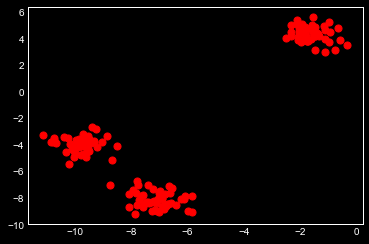

In [7]:
# EDA 
''' visualize to see what the make-blobs has returned '''
plt.style.use('dark_background')
plt.scatter(X[:,0],X[:,1],c='red',marker='o', s=50)
plt.grid()
plt.show()

## 1. k-means clustering

- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- class *sklearn.cluster.KMeans*
- go through the parameters in the link 


$$arg min_c \sum\limits_{j=1}^k \sum\limits_{x=c_j} ( d(x, \mu_j) = arg min_c \sum\limits_{j=1}^k \sum\limits_{x=c_j} \big( ||x-\mu_j||^2 \big)^{1/2}$$


In [8]:
# import Kmeans from sklearn, try with different values of cluster group (1-5)

from sklearn.cluster import KMeans

''' Based on your understanding from the kmeans parameters in the link, select the parameters according but 
Make random_state = 0'''

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

* Visualize the cluster group and centroid computed from model
* Coordinates of cluster centers can be obtained from the model (see [1])
* What do you think will the be no of unclassified labels here ??

[1.] http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

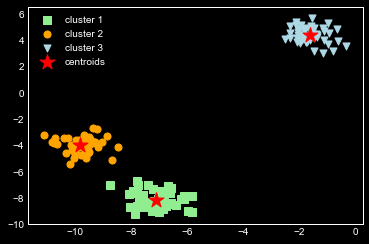

In [9]:
''' It is recommended to use different markers and colors for each class/clusters'''

# Use scatter plot matrix to visualize the samples and the centroids
plt.scatter(X[y_km==0,0], X[y_km ==0,1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km ==1,0],X[y_km ==1,1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km ==2,0], X[y_km ==2,1], s=50, c='lightblue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()
plt.figure.figsize= (15,8)

* Since the no of samples in the observation is less and the centroid is placed sufficiently. 
* But in real dataset, we would not have a definitive answer
* Hence, we need to evaluate the model and quantify the quality of clustering. from the textbook you would be introduced to different metrics of measure - Rand Index, Homogeniety, Completeness and V-measures, Silhouette scores. Some of these are straight forward.
* For the above model, evaluate using within-cluster SSE (also known as distortion) and visualize it for different neighbors (1-10)
* Similar try with Silhouette plots

[1.] http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[2.] http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


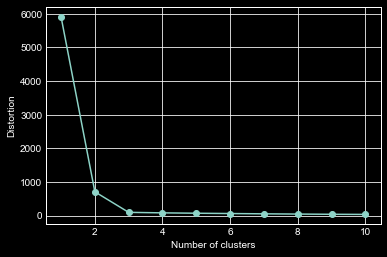

In [10]:
''' Using for loop, fit the kmeans models for n-clusters from 1 to 10, let random state be 0, maxx iter = 100, n_init = 10.

Step 1: initialize the model
Step 2: fit the model
Step 3: internal model of kmeans has one of the attributes as interia_, append these and plot after looped out.
'''


distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=100, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Silhouette plots

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [4]:
'''silhouette is to be imported from metrics package'''

from sklearn.metrics import silhouette_samples

In [16]:
''' The second link provided above, selecting the no of cluster i.e., unlabeled targets based on silhouette is discussed.
further, in the below cell,initialize the model, fit and make necessaary changes to the code to display a plot of

'''
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

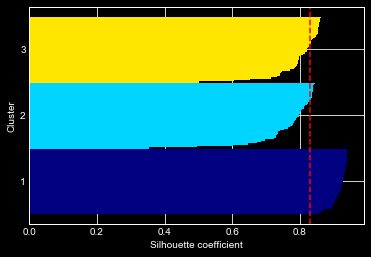

In [18]:
""" No modification needed"""

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## 2. Hierarchical clustering


http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [23]:
''' * Lets use make_moons.
    * use sample size = 300, noise = 5%, random state = 0
    * from link above for agc intialize the agglomerative clustering with no of cluster =2 and other parameters as necessary'''
from sklearn.cluster import AgglomerativeClustering
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)
agc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

# use fit_predict and print the cluster output
y_agc = agc.fit_predict(X)
print('Cluster labels: %s' % y_agc)

Cluster labels: [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0]


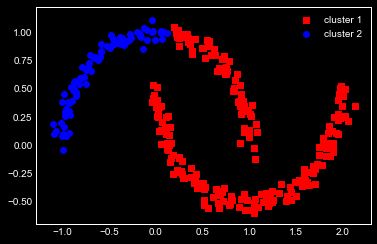

In [25]:
""" Similar to the kMeans, visulize the cluster type for the sample"""
plt.scatter(X[y_agc==0,0], X[y_agc ==0,1], c='red', marker='s', label='cluster 1')
plt.scatter(X[y_agc ==1,0],X[y_agc ==1,1], c='blue', marker='o', label='cluster 2')
plt.legend()
plt.grid()
plt.show()

From the plot of half moons for both Kmeans and Agg clustering method, it can be observed that the clustering is not efficient. This is mainly becuase of the samples which has an orbitrary shapes. 
* DBSCAN 
* handles clustering data of arbitrary shapes efficiently
* http://scikit-learn.org/stable/modules/clustering.html
* http://scikit-learn.org/stable/modules/clustering.html#dbscan

In [26]:
''' Import DBscan from sklearn, use eps = 0.2, min_samples = 5, metric = 'euclidean' '''

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

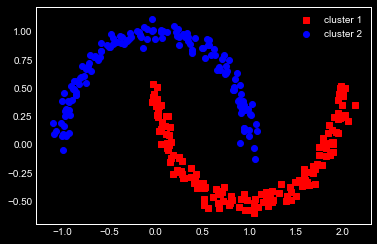

In [28]:
''' Doing same thing but for DBSCAN'''
plt.scatter(X[y_db==0,0], X[y_db ==0,1], c='red', marker='s', label='cluster 1')
plt.scatter(X[y_db ==1,0],X[y_db ==1,1], c='blue', marker='o', label='cluster 2')
plt.legend()
plt.grid()
plt.show()

## Evaluating cluster performance

### http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

In [29]:
''' Using piece of code from class, evaluate the performance of all the above clustering techniques'''

km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

print ('Final evaluation of the clustering: K-Means')
print('Inertia: %.2f' %  km.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y_km.ravel(),km.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y_km.ravel(),km.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y_km.ravel(),km.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y_km.ravel(), km.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, km.labels_, metric='euclidean'))

Final evaluation of the clustering: K-Means
Inertia: 82.12
Adjusted_rand_score 1.00
Homogeneity 1.00
Completeness 1.00
V_measure 1.00
Silhouette 0.42


In [30]:
print ('Final evaluation of the clustering: HCA ')
# print('Inertia: %.2f' %  db.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y_agc.ravel(), agc.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y_agc.ravel(), agc.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y_agc.ravel(), agc.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y_agc.ravel(), agc.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, agc.labels_, metric='euclidean'))

Final evaluation of the clustering: HCA 
Adjusted_rand_score 1.00
Homogeneity 1.00
Completeness 1.00
V_measure 1.00
Silhouette 0.44


In [31]:
print ('Final evaluation of the clustering:DBSCAN ')
# print('Inertia: %.2f' %  db.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y_db.ravel(), db.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y_db.ravel(), db.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y_db.ravel(), db.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y_db.ravel(), db.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, db.labels_, metric='euclidean'))

Final evaluation of the clustering:DBSCAN 
Adjusted_rand_score 1.00
Homogeneity 1.00
Completeness 1.00
V_measure 1.00
Silhouette 0.33


## 3. WINE DATASET

From UCI repository, download the wine dataset and apply the above NB classifiers, k-Means and HCA 

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [32]:
''' Lets try on the real dataset.
we have used the wine dataset earlier. we would be using this for clustering application and since we know that the target group 
is the wine quality and is a part of this dataset in the link'''

'''From the url given, import the dataset using pd.read_csv,
make necessary changes for successfully reading this data
update the column names with the data description given in the UCI link'''

url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data" 
wine = pd.read_csv(url,sep = ',', header=None)
wine.columns = ['class', 'Alcohol','Malic acid','Ash','Alcalinity of ash' ,'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [33]:
''' since, target class is also part of the data, slice the data and assign to y and remaining data to variable X'''
X = wine.iloc[:, 1:14]
y = wine.iloc[:, 0]

In [34]:
wine.describe()


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [37]:
np.unique(y)

array([1, 2, 3], dtype=int64)

C:\Users\hvempral\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hvempral\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hvempral\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


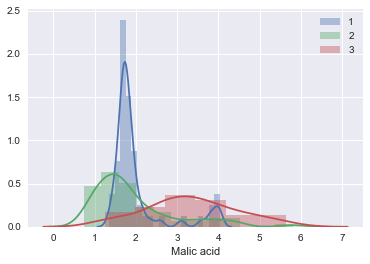

In [38]:
sns.set()


for i in np.unique(y):
    sns.distplot(wine['Malic acid'][y==i], kde=1,label='{}'.format(i))
plt.legend()


### Gaussian Naive Bayes Classification



In [48]:
''' Apply Naive Bayes classification to this and check if the classification matches the target class?'''
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# load the iris datasets
dataset = datasets.load_wine()
# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(X, y)
print(model)

GaussianNB(priors=None)


**Using either confusion matrix or classification report, see which one seems to be apt in NB ?**

In [49]:
''' We have to evaluate the model inorder to gauge the parameter selected ofcourse. Since, this is a classification, 
we can use classification report from metrics and/or confusion matrix'''
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          1       1.00      0.98      0.99        59
          2       0.99      0.99      0.99        71
          3       0.98      1.00      0.99        48

avg / total       0.99      0.99      0.99       178

[[58  1  0]
 [ 0 70  1]
 [ 0  0 48]]


### kMeans Clustering

In [51]:
''' Use the excercises above for wine dataset and apply kMeans , AGC for wine dataset'''
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

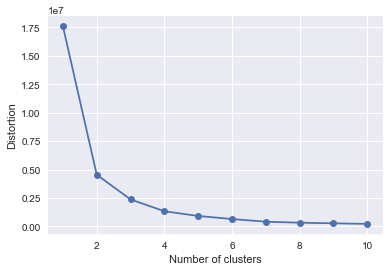

In [52]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=100, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

   
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [53]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

print ('Final evaluation of the clustering:')
print('Inertia: %.2f' %  km.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y_km.ravel(),km.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y_km.ravel(),km.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y_km.ravel(),km.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y_km.ravel(), km.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, km.labels_, metric='euclidean'))

Final evaluation of the clustering:
Inertia: 2370689.69
Adjusted_rand_score 1.00
Homogeneity 1.00
Completeness 1.00
V_measure 1.00
Silhouette 0.57


### Agglomerative clustering

In [55]:
### As done in class, use those piece of code to produce a dendogram plot

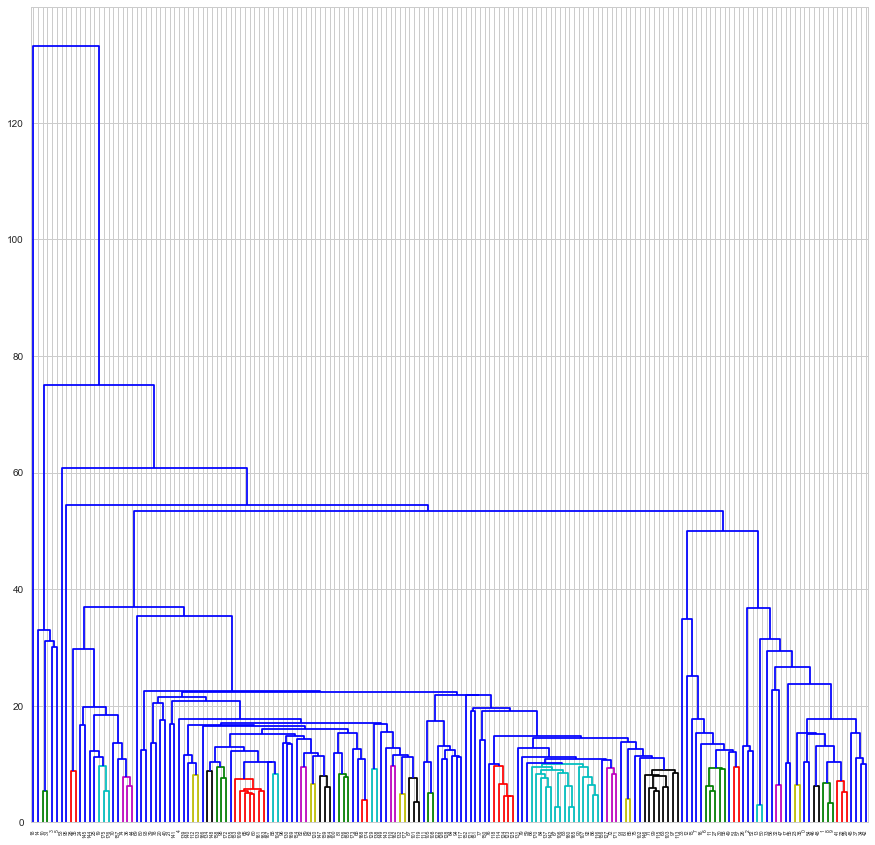

In [57]:
sns.set_style("whitegrid")

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

dist = pdist(X,'euclidean')
linked = linkage(X, 'single')
# linkage_matrix = linkage(dist, method = 'complete');
plt.figure()  # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((15,15))
dendrogram(linked, orientation="top", color_threshold = 10, distance_sort='descending', show_leaf_counts=True)

plt.show()

### Heatmaps clustering

Heatmap and dendrogram can be produced using seaborn

* https://seaborn.pydata.org/generated/seaborn.clustermap.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    

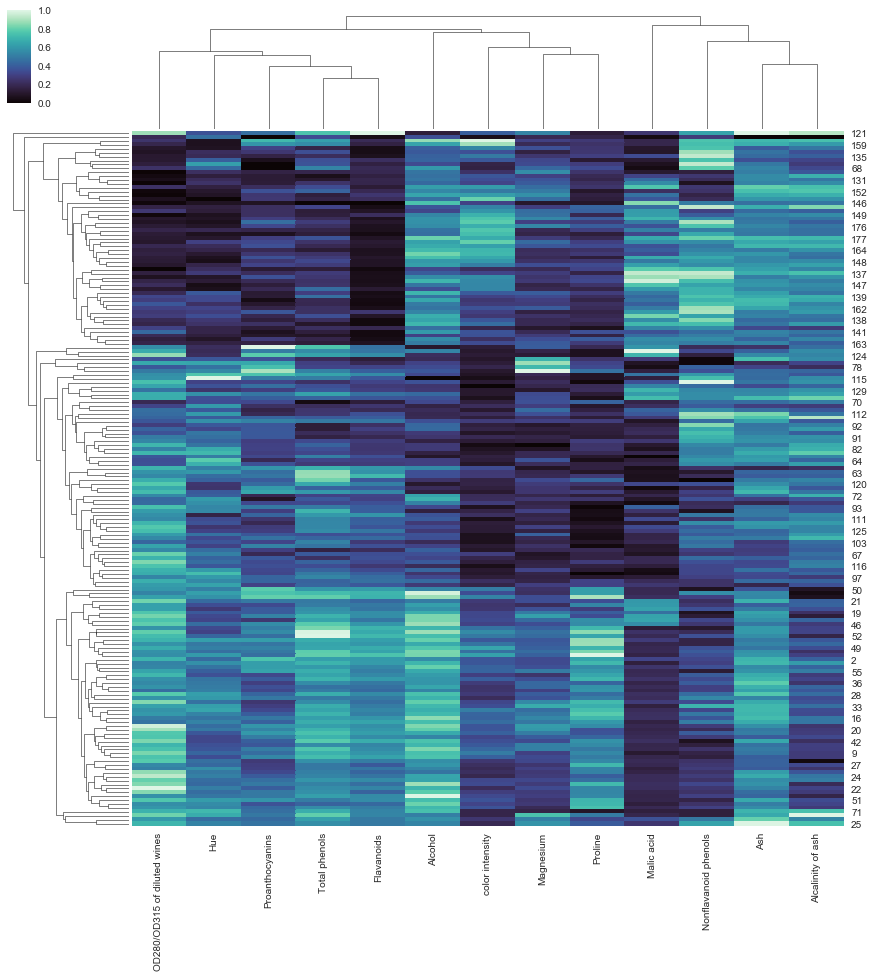

In [58]:
import seaborn as sns; 
g = sns.clustermap(X,  method='average', metric='euclidean', figsize=(15, 15), standard_scale=1, cmap="mako")